In [ ]:
#%pip install ultralytics

In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pytesseract
import numpy as np
import os
from PIL import Image, ImageOps

In [3]:
# YOLOv8 모델 로드
model = YOLO('yolov8n.pt')  # 적절한 YOLOv8 모델 파일 경로로 변경

In [17]:
results = model("C:/Users/mysorol/바탕 화면/imworking/chkchk/test_modeling/img/book1.jpg")
# preds = model.predict("C:/Users/mysorol/바탕 화면/imworking/chkchk/test_modeling/img/book1.jpg", save_crop=False, show_labels=False, line_width=0, save=False)
results[0].show()


image 1/1 C:\Users\mysorol\ \imworking\chkchk\test_modeling\img\book1.jpg: 640x480 20 books, 107.8ms
Speed: 2.0ms preprocess, 107.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


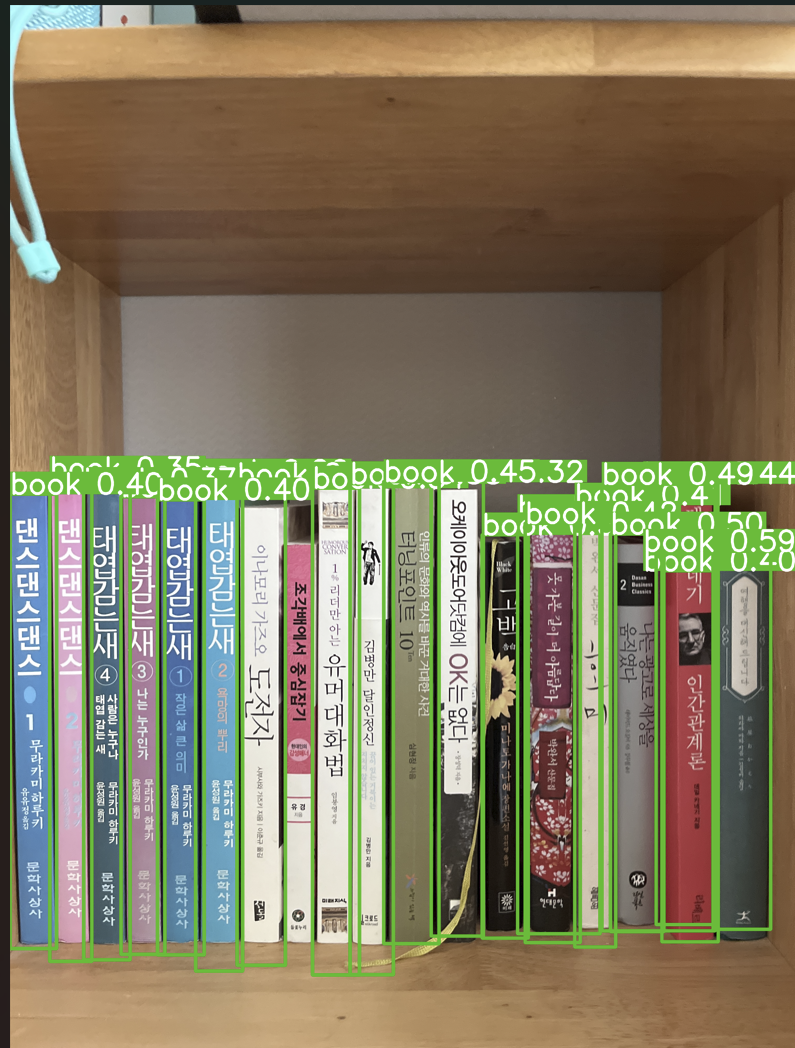

In [4]:
# 잘라서 저장하기 
results[0].save_crop('crop')

In [8]:
# YOLOv8 모델 로드
model = YOLO('yolov8n.pt')

# 이미지 경로
image_path = "C:/Users/mysorol/바탕 화면/imworking/chkchk/test_modeling/img/book1.jpg"

# 모델을 이용해 객체 감지
results = model(image_path)

# 원본 이미지 열기
original_image = Image.open(image_path)

# 크롭된 이미지를 원본 크기로 패딩하여 저장
for i, crop in enumerate(results[0].boxes.xyxy):
    left, top, right, bottom = map(int, crop)
    cropped_img = original_image.crop((left, top, right, bottom))
    
    # 새로운 이미지 생성 및 원본 크기로 패딩
    padded_img = Image.new("RGB", original_image.size)
    padded_img.paste(cropped_img, (left, top))

    # 크롭된 이미지 저장 경로 설정
    save_path = f'crop_{i}.jpg'
    padded_img.save(save_path)
    print(f'Saved in {save_path}')

print("Cropping and padding completed.")



image 1/1 C:\Users\mysorol\ \imworking\chkchk\test_modeling\img\book1.jpg: 640x480 20 books, 64.2ms
Speed: 2.0ms preprocess, 64.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Saved in crop_0.jpg
Saved in crop_1.jpg
Saved in crop_2.jpg
Saved in crop_3.jpg
Saved in crop_4.jpg
Saved in crop_5.jpg
Saved in crop_6.jpg
Saved in crop_7.jpg
Saved in crop_8.jpg
Saved in crop_9.jpg
Saved in crop_10.jpg
Saved in crop_11.jpg
Saved in crop_12.jpg
Saved in crop_13.jpg
Saved in crop_14.jpg
Saved in crop_15.jpg
Saved in crop_16.jpg
Saved in crop_17.jpg
Saved in crop_18.jpg
Saved in crop_19.jpg
Cropping and padding completed.


In [24]:
image_path = 'C:/Users/mysorol/바탕 화면/imworking/chkchk/test_modeling/crop/book/im.jpg14.jpg'


0: 640x64 (no detections), 69.7ms
Speed: 4.3ms preprocess, 69.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 64)


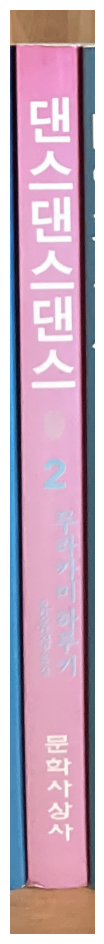

In [25]:
# 책 한권씩 자른 이미지에서 title을 detection 하는지 체크 
# save_crop의 default 설정이 crop후 확대저장됨 
image = cv2.imread(image_path)

results = model(image)

annotated_image = image.copy()

# 감지된 객체를 네모 상자로 표시하고, 책 제목 부분을 추출
for result in results[0].boxes:
    x1, y1, x2, y2 = result.xyxy[0]
    conf = result.conf[0]
    cls = result.cls[0]
    
    cv2.rectangle(annotated_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    
    book_image = image[int(y1):int(y2), int(x1):int(x2)]

    # 제목 추출 (여기서는 전체 책 영역에서 OCR을 수행)
    title_text = pytesseract.image_to_string(book_image, config='--psm 6', lang='kor+eng')
    print(f'Detected Title: {title_text.strip()}')

# 이미지를 RGB로 변환
image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [11]:
# 검정색 배경으로 패딩 하지 않고 원본사이즈 유지해 crop하고 배경은 투명하게 처리 
from ultralytics import YOLO
from PIL import Image, ImageDraw

# YOLOv8 모델 로드
model = YOLO('yolov8n.pt')

# 이미지 경로
image_path = "C:/Users/mysorol/바탕 화면/imworking/chkchk/test_modeling/img/book1.jpg"

# 모델을 이용해 객체 감지
results = model(image_path)

# 원본 이미지 열기
original_image = Image.open(image_path).convert("RGBA")

# 원본 크기 유지하며 객체 영역만 남기기
for i, crop in enumerate(results[0].boxes.xyxy):
    left, top, right, bottom = map(int, crop)
    
    # 원본 크기의 투명한 이미지 생성
    transparent_image = Image.new("RGBA", original_image.size, (0, 0, 0, 0))
    
    # 크롭된 이미지를 투명한 이미지에 붙여넣기
    cropped_img = original_image.crop((left, top, right, bottom))
    transparent_image.paste(cropped_img, (left, top))
    
    # 저장 경로 설정
    save_path = f'crop_t{i}.png'
    transparent_image.save(save_path)
    print(f'Saved {save_path}')

print("Cropping and saving completed.")




image 1/1 C:\Users\mysorol\ \imworking\chkchk\test_modeling\img\book1.jpg: 640x480 20 books, 88.0ms
Speed: 3.0ms preprocess, 88.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Saved crop_t0.png
Saved crop_t1.png
Saved crop_t2.png
Saved crop_t3.png
Saved crop_t4.png
Saved crop_t5.png
Saved crop_t6.png
Saved crop_t7.png
Saved crop_t8.png
Saved crop_t9.png
Saved crop_t10.png
Saved crop_t11.png
Saved crop_t12.png
Saved crop_t13.png
Saved crop_t14.png
Saved crop_t15.png
Saved crop_t16.png
Saved crop_t17.png
Saved crop_t18.png
Saved crop_t19.png
Cropping and saving completed.



0: 640x480 1 book, 115.9ms
Speed: 5.2ms preprocess, 115.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Detected Title: 


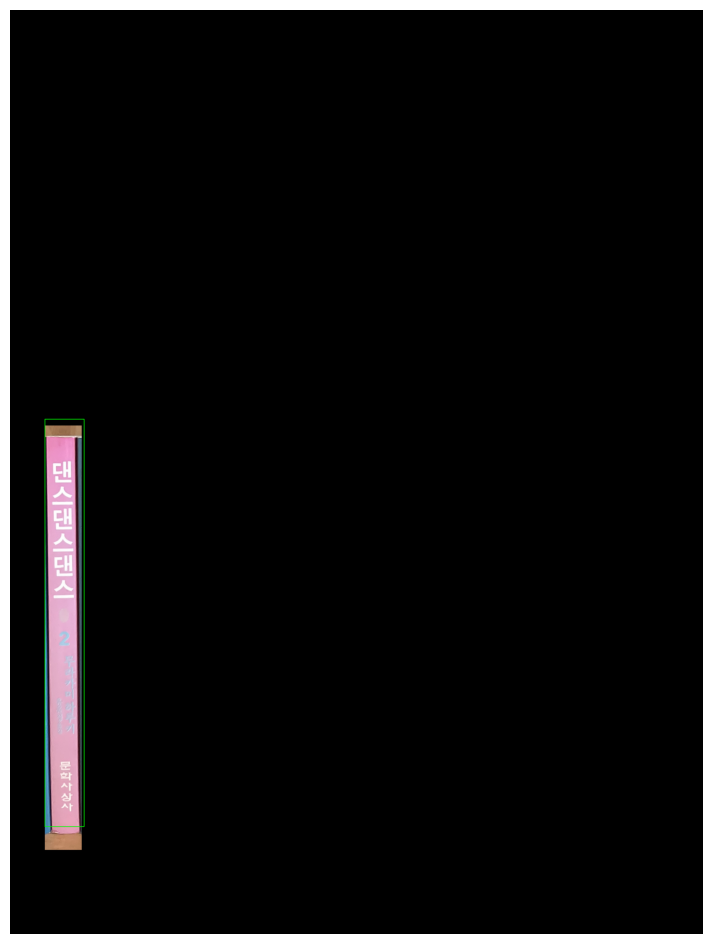

In [27]:
#투명배경으로 저장된 한 권 이미지 title detection 
image_path = 'C:/Users/mysorol/바탕 화면/imworking/chkchk/test_modeling/crop_t13.png'
image = cv2.imread(image_path)

results = model(image)

annotated_image = image.copy()

# 감지된 객체를 네모 상자로 표시하고, 책 제목 부분을 추출
for result in results[0].boxes:
    x1, y1, x2, y2 = result.xyxy[0]
    conf = result.conf[0]
    cls = result.cls[0]
    
    cv2.rectangle(annotated_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    
    book_image = image[int(y1):int(y2), int(x1):int(x2)]

    # 제목 추출 (여기서는 전체 책 영역에서 OCR을 수행)
    title_text = pytesseract.image_to_string(book_image, config='--psm 6', lang='kor+eng')
    print(f'Detected Title: {title_text.strip()}')

# 이미지를 RGB로 변환
image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [ ]:
기울어져있는 책장 똑바로 돌리는 거 

제목부분 / 저자랑 따로 저장하는 거 

텍스트 

어떤 환경에서 ocr 이 만들어진건지 데이터셋을 확인하고 그 환경을 비슷하게 만들어주는것도 중요 

어떤 모델 가중치를 가져다쓸때는 데이터셋을 확인하는 것도 필수 

스크래피가 비동기 처리라서 자원을 효율적으로 쓴다. 멀티쓰레딩에 비동기함수를 공부하는 것도 방법

streamlit


파인튜닝 방향을 바꾸게 - yolov8이 잘 인식하는 사이즈로 이미지를 자르고 여러부분을 yolov8 가중치를 그대로 쓰면서, 이미지를 잘라서 해라
책장 데이터를 많이 만들어오는것보다 


In [ ]:
# 제목을 detection하는데 yolov8s사용해보기 

# YOLOv8 모델 로드
model = YOLO('yolov8n.pt')  # 적절한 YOLOv8 모델 파일 경로로 변경

# 이미지 경로 설정
image_path = 'C:/Users/mysorol/바탕 화면/imworking/chkchk/test_modeling/crop/book/im.jpg12.jpg'

# 이미지 로드
image = cv2.imread(image_path)

# 모델로 객체 감지 수행
results = model(image)

# 이미지 복사본 생성 (원본 이미지를 보존하기 위해)
annotated_image = image.copy()

# 감지된 객체를 네모 상자로 표시하고, 책 제목 부분을 추출
for result in results[0].boxes:
    x1, y1, x2, y2 = result.xyxy[0]
    conf = result.conf[0]
    cls = result.cls[0]
    
    cv2.rectangle(annotated_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    
    # 책 영역을 잘라내기
    # book_image = image[int(y1):int(y2), int(x1):int(x2)]
    
    # 제목 추출 (여기서는 전체 책 영역에서 OCR을 수행)
    title_text = pytesseract.image_to_string(book_image, config='--psm 6', lang='kor+eng')
    print(f'Detected Title: {title_text.strip()}')

    # 감지된 제목을 이미지에 표시
    # cv2.putText(annotated_image, title_text.strip(), (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# 이미지를 RGB로 변환 (OpenCV는 BGR을 사용하기 때문에)
image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()